In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("project2-data1.csv")

In [3]:
data.head(10)

,population(10K),profit(10K$)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
X = data.values[:, 0]
y = data.values[:, 1]

In [5]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [6]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [7]:
m = y.shape[0]
m

97

In [8]:
def plot_Data(x, y):
    plt.figure(figsize= (6, 4))
    plt.plot(x, y, "ro", ms= 7, mec= "k")
    plt.xlabel('Population')
    plt.ylabel('Profit')

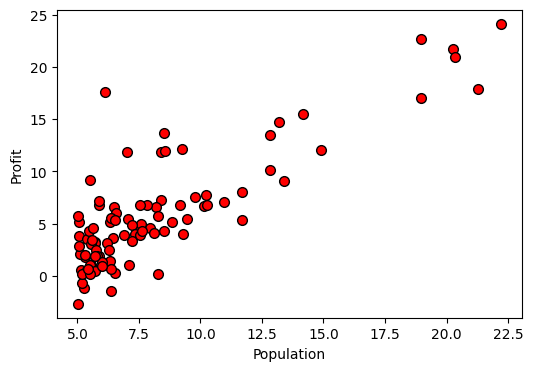

In [9]:
plot_Data(X, y)

In [10]:
print(f"Shape of X is : {X.shape}")
print(f"Shape of y is : {y.shape}")

Shape of X is : (97,)
Shape of y is : (97,)


In [11]:
X = np.expand_dims(X, 1)
X = np.transpose(X)
X.shape

(1, 97)

In [12]:
y = np.expand_dims(y, 1)
y = np.transpose(y)
y.shape

(1, 97)

In [13]:
X = np.concatenate([np.ones((1, m)), X], axis= 0)
X.shape

(2, 97)

In [14]:
def Cost(X, Y, theta_temp):
  m = X.shape[1]
  temp = np.matmul(np.transpose(theta_temp), X) - Y
  cost = np.matmul(temp, np.transpose(temp)) / (2 * m)
  return cost

In [15]:
theta = np.array([[0], [0]])
cost = Cost(X, y, theta)
print(f"initial cost is : {cost}")

initial cost is : [[32.07273388]]


In [16]:
def Gradient_Descent(X, Y, thetatemp, lr, epochs):
  m = X.shape[1]
  cost_history = []
  for epoch in range(epochs):
    temp = np.transpose(np.matmul(np.transpose(thetatemp), X) - Y)
    thetatemp = thetatemp - (lr / m) * np.matmul(X, temp)
    cost_history.append(Cost(X, Y, thetatemp)[0, 0])

  return thetatemp, cost_history  

In [17]:
theta = np.array([[0], [0]])
epochs = 1500
lr = 0.01
thetanew, cost_history = Gradient_Descent(X, y, theta, lr, epochs)
thetanew

array([[-3.63029144],
       [ 1.16636235]])

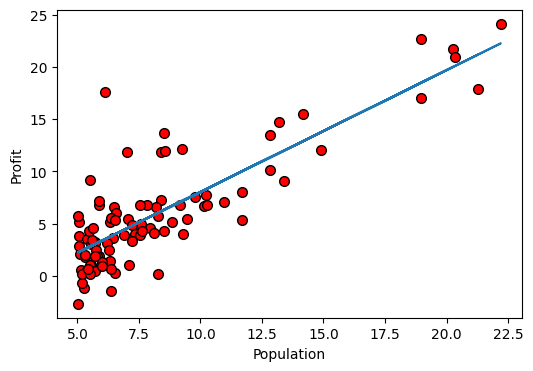

In [18]:
plot_Data(X[1, :], y[0, :])
plt.plot(X[1, :], np.matmul(np.transpose(thetanew), X)[0,:])

In [19]:
profit = np.matmul(np.transpose(thetanew), np.array([[1], [7]]))
print("profit(10K$): ", profit)
print("profit($): ", profit* 10000)

profit(10K$):  [[4.53424501]]
profit($):  [[45342.45012945]]


In [20]:
thetanew[0] *1 + thetanew[1] * 7

array([4.53424501])

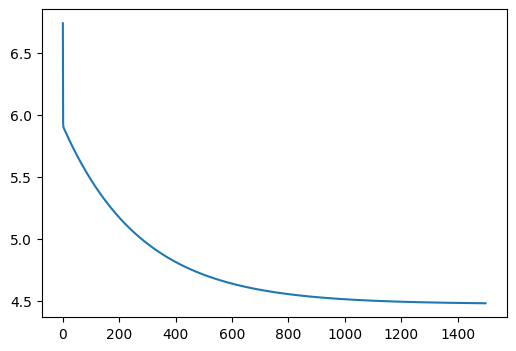

In [21]:
plt.figure(figsize= (6, 4))
plt.plot(cost_history)